# Avsluttende programmeringsprosjekt ProgMod
## Problemstillingene
* Hvordan kan vi bruke programmering til å modellere og simulere kunstig intelligens? 
* Hvilke faktorer påvirker læring, beslutningstaking og etikk? 
* Hvilke begrensninger har modellene dine, og drøft hva de forteller oss om kunstig intelligens?

# Innhold
1. Introduksjon
    - Definisjon og kort beskrivelse av maskinnlæring
2. Eksempler på maskinlæring
    - Forskjellig modeller sammenliknet for forskjllig treningsandeler
3. Resultater
    - En objektiv analyse av resultatene
4. Drøfting
    - Drøfting av resultatene
5. Maskinlæring i samfunnet
    - Drøfting rundt bruken av maskinlæring i samfunnet generelt
6. Konklusjon
    - Oppsumering av alle delene

In [43]:
# Import/define

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import neighbors, tree, ensemble, linear_model, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras import layers


def map_string_to_number(s):
    # Define your custom mapping from strings to numbers here
    if s == 'Adelie' or s == 'MALE' or s == 'tree':
        return float(0)
    elif s == 'Chinstrap' or s == 'FEMALE' or s == 'RandomForestClassifier':
        return float(1)
    elif s == 'Gentoo' or s == 'LogisticRegression':
        return float(2)
    elif s == 'KNeighborsClassifier':
        return float(3)
    elif s == 'SVC':
        return float(4)
    elif s == 'NN':
        return float(5)
    elif type(s) == 'float':
        return s
    else:
        return 100
    
titles = {'model':[], 'treningsandel': [], 'accuracy': []}
model_eval = pd.DataFrame(titles)

test_amount = 40
test_amoun_nn = 10

In [11]:
# tree.DecisionTreeClassifier

pingvindata = pd.read_csv("C:\\Users\\elias\\Documents\\GitHub_loc\\ModelleringII\\penguings.txt", delimiter = ",")

criteria = pingvindata[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # features
categories = pingvindata['species']                         # labels

# A loop for testing different training sizes
for i in range(10, 90):
    accuracy_list = []
    trainingsize_eval = i/100
    
    # Runs the model 10 times and takes the average score for the same training size to try to eliminate outliers
    for j in range (test_amount):
        ml_data = train_test_split(criteria, categories, train_size=trainingsize_eval, random_state=42)

        training_criteria = ml_data[0]
        test_criteria = ml_data[1]
        training_categories = ml_data[2]
        testkategorier = ml_data[3]
        
        model = tree.DecisionTreeClassifier()  # Makes the model
        model.fit(training_criteria, training_categories)   # Trains the model

        predictions = model.predict(test_criteria)

        precision = precision_score(testkategorier, predictions, average='macro')
        accuracy_list.append(precision)
        
    # Takes the average of 10 runs and adds it to the data frame for eval   
    accuracy_avrg = sum(accuracy_list) / len(accuracy_list)
    data = pd.DataFrame({'model':['tree'], 'treningsandel': [trainingsize_eval], 'accuracy': [accuracy_avrg]})
    model_eval = pd.concat([model_eval, data], ignore_index=True)


In [12]:
# RandomForestClassifier

pingvindata = pd.read_csv("C:\\Users\\elias\\Documents\\GitHub_loc\\ModelleringII\\penguings.txt", delimiter = ",")

criteria = pingvindata[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # features
categories = pingvindata['species']                         # labels

# A loop for testing different training sizes
for i in range(10, 90, 2):
    accuracy_list = []
    trainingsize_eval = i/100
    for j in range (test_amount):
        ml_data = train_test_split(criteria, categories, train_size=trainingsize_eval, random_state=42)

        training_criteria = ml_data[0]
        test_criteria = ml_data[1]
        training_categories = ml_data[2]
        testkategorier = ml_data[3]

        model = RandomForestClassifier()  # Makes the model
        model.fit(training_criteria, training_categories)   # Trains the model

        predictions = model.predict(test_criteria)
        
        precision = precision_score(testkategorier, predictions, average='macro')
        accuracy_list.append(precision)
    
    # Takes the average of 10 runs and adds it to the data frame for eval
    accuracy_avrg = sum(accuracy_list) / len(accuracy_list)
    data = pd.DataFrame({'model':['RandomForestClassifier'], 'treningsandel': [trainingsize_eval], 'accuracy': [accuracy_avrg]})
    model_eval = pd.concat([model_eval, data], ignore_index=True)


In [13]:
# LogisticRegression

pingvindata = pd.read_csv("C:\\Users\\elias\\Documents\\GitHub_loc\\ModelleringII\\penguings.txt", delimiter = ",")

criteria = pingvindata[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # features
categories = pingvindata['species']                         # labels

# A loop for testing different training sizes
for i in range(10, 90):
    accuracy_list = []
    trainingsize_eval = i/100
    
    # Runs the model 10 times and takes the average score for the same training size to try to eliminate outliers
    for j in range (test_amount):
        ml_data = train_test_split(criteria, categories, train_size=trainingsize_eval, random_state=42)

        training_criteria = ml_data[0]
        test_criteria = ml_data[1]
        training_categories = ml_data[2]
        testkategorier = ml_data[3]
        
        model = LogisticRegression(max_iter=2000)  # Makes the model
        model.fit(training_criteria, training_categories)   # Trains the model

        predictions = model.predict(test_criteria)
       
        precision = precision_score(testkategorier, predictions, average='macro')
        accuracy_list.append(precision)
    
    # Takes the average of 10 runs and adds it to the data frame for eval    
    accuracy_avrg = sum(accuracy_list) / len(accuracy_list)
    data = pd.DataFrame({'model':['LogisticRegression'], 'treningsandel': [trainingsize_eval], 'accuracy': [accuracy_avrg]})
    model_eval = pd.concat([model_eval, data], ignore_index=True)


In [14]:
# KNeighborsClassifier

pingvindata = pd.read_csv("C:\\Users\\elias\\Documents\\GitHub_loc\\ModelleringII\\penguings.txt", delimiter = ",")

criteria = pingvindata[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # features
categories = pingvindata['species']                         # labels

# A loop for testing different training sizes
for i in range(10, 90):
    accuracy_list = []
    trainingsize_eval = i/100
    
    # Runs the model 10 times and takes the average score for the same training size to try to eliminate outliers
    for j in range (test_amount):
        ml_data = train_test_split(criteria, categories, train_size=trainingsize_eval, random_state=42)

        training_criteria = ml_data[0]
        test_criteria = ml_data[1]
        training_categories = ml_data[2]
        testkategorier = ml_data[3]

        model = KNeighborsClassifier()  # Makes the model
        model.fit(training_criteria, training_categories)   # Trains the model

        predictions = model.predict(test_criteria)
        
        precision = precision_score(testkategorier, predictions, average='macro')
        accuracy_list.append(precision)

    # Takes the average of 10 runs and adds it to the data frame for eval        
    accuracy_avrg = sum(accuracy_list) / len(accuracy_list)
    data = pd.DataFrame({'model':['KNeighborsClassifier'], 'treningsandel': [trainingsize_eval], 'accuracy': [accuracy_avrg]})
    model_eval = pd.concat([model_eval, data], ignore_index=True)


In [15]:
# SVC

pingvindata = pd.read_csv("C:\\Users\\elias\\Documents\\GitHub_loc\\ModelleringII\\penguings.txt", delimiter = ",")

criteria = pingvindata[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # features
categories = pingvindata['species']                         # labels

# A loop for testing different training sizes
for i in range(10, 90):
    accuracy_list = []
    trainingsize_eval = i/100

    # Runs the model 10 times and takes the average score for the same training size to try to eliminate outliers
    for j in range (test_amount):
        ml_data = train_test_split(criteria, categories, train_size=trainingsize_eval, random_state=42)

        training_criteria = ml_data[0]
        test_criteria = ml_data[1]
        training_categories = ml_data[2]
        testkategorier = ml_data[3]

        model = SVC()  # Makes the model
        model.fit(training_criteria, training_categories)   # Trains the model

        predictions = model.predict(test_criteria)

        precision = precision_score(testkategorier, predictions, average='macro', zero_division=1)
        accuracy_list.append(precision)
    
    # Takes the average of 10 runs and adds it to the data frame for eval
    accuracy_avrg = sum(accuracy_list) / len(accuracy_list)
    data = pd.DataFrame({'model':['SVC'], 'treningsandel': [trainingsize_eval], 'accuracy': [accuracy_avrg]})
    model_eval = pd.concat([model_eval, data], ignore_index=True)


In [16]:
# Nevral Nett flere lag

pingvindata = pd.read_csv("C:\\Users\\elias\\Documents\\GitHub_loc\\ModelleringII\\penguings.txt", delimiter = ",")

pingvindata['species'] = pingvindata['species'].map(map_string_to_number)
pingvindata['sex'] = pingvindata['sex'].map(map_string_to_number)

total_iterations = 160

criteria = pingvindata[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # features
categories = pingvindata['species']

# Adds a progressbar
with tqdm(total=total_iterations, desc="Training") as pbar:
    # A loop for testing different training sizes
    for i in range(10, 90, 5):
        accuracy_list = []
        trainingsize_eval = i/100
        
        # Runs the model 10 times and takes the average score for the same training size to try to eliminate outliers
        for j in range(test_amoun_nn):
            model = tf.keras.Sequential()
            model.add(layers.Dense(10, activation="sigmoid", input_shape=(4,)))
            model.add(layers.Dense(10, activation="sigmoid"))
            model.add(layers.Dense(10, activation="sigmoid"))

            model.add(layers.Dense(1, activation="linear"))
        
            
            model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
                loss='mean_squared_error',
                metrics=['accuracy']) 
            
            
            ml_data = train_test_split(criteria, categories, train_size=trainingsize_eval, random_state=42)
            x = ml_data[0]
            X_test = ml_data[1]
            y = ml_data[2]
            y_test = ml_data[3]            

            model.fit(x, y, epochs=150, verbose=0)

            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

            accuracy_list.append(accuracy)
            
            pbar.update(1)

        # Takes the average of 10 runs and adds it to the data frame for eval
        accuracy_avrg = sum(accuracy_list) / len(accuracy_list)
        data = pd.DataFrame({'model':['NN mange lag'], 'treningsandel': [trainingsize_eval], 'accuracy': [accuracy_avrg]})
        model_eval = pd.concat([model_eval, data], ignore_index=True)


Training: 100%|██████████| 160/160 [04:19<00:00,  1.62s/it]


In [17]:
# Nevral Nett Endelig

pingvindata = pd.read_csv("C:\\Users\\elias\\Documents\\GitHub_loc\\ModelleringII\\penguings.txt", delimiter = ",")

pingvindata['species'] = pingvindata['species'].map(map_string_to_number)
pingvindata['sex'] = pingvindata['sex'].map(map_string_to_number)

total_iterations = 160

criteria = pingvindata[['bill_length_mm', 'bill_depth_mm',]] # features  
categories = pingvindata['species']

# Adds a progressbar
with tqdm(total=total_iterations, desc="Training") as pbar:
    # A loop for testing different training sizes
    for i in range(10, 90, 5):
        accuracy_list = []
        trainingsize_eval = i/100
        
        # Runs the model 10 times and takes the average score for the same training size to try to eliminate outliers
        for j in range(test_amoun_nn):
            model = tf.keras.Sequential()
            model.add(layers.Dense(10, activation="sigmoid", input_shape=(2,)))
            #model.add(layers.Dense(8, activation="sigmoid"))
            model.add(layers.Dense(1, activation="linear"))
                        
            model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
                loss='mean_squared_error',
                metrics=['accuracy']) 
            
            
            ml_data = train_test_split(criteria, categories, train_size=trainingsize_eval, random_state=42)
            x = ml_data[0]
            X_test = ml_data[1]
            y = ml_data[2]
            y_test = ml_data[3]            

            model.fit(x, y, epochs=150, verbose=0)

            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            
            accuracy_list.append(accuracy)
            
            pbar.update(1)

        # Takes the average of 10 runs and adds it to the data frame for eval
        accuracy_avrg = sum(accuracy_list) / len(accuracy_list)
        data = pd.DataFrame({'model':['NN'], 'treningsandel': [trainingsize_eval], 'accuracy': [accuracy_avrg]})
        model_eval = pd.concat([model_eval, data], ignore_index=True)


Training: 100%|██████████| 160/160 [03:30<00:00,  1.32s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


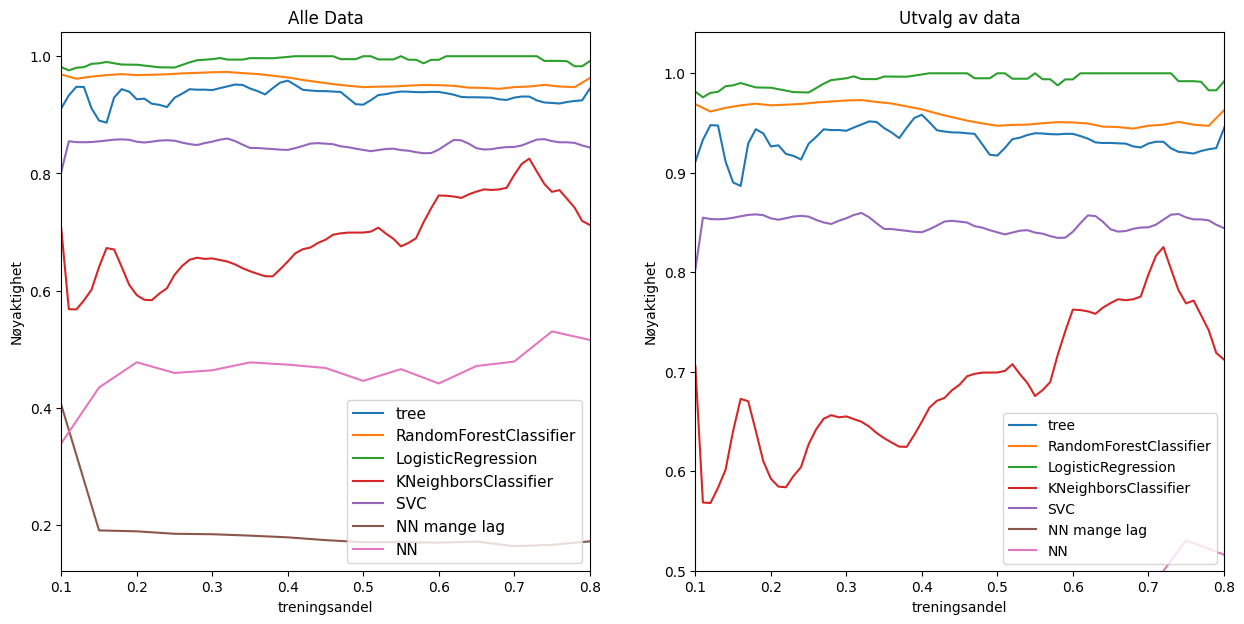

In [18]:
# Modell evaluering
from scipy.signal import savgol_filter    

model_eval_plot = model_eval.copy()
model_eval_plot["accuracy"] = model_eval_plot[["accuracy"]].apply(savgol_filter,  window_length=3, polyorder=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Makes a plot with all the data
sns.lineplot(data=model_eval_plot, x='treningsandel', y='accuracy', hue='model', ax=ax1)
ax1.set_title('Alle Data')
ax1.set_ylabel('Nøyaktighet')
plt.legend(fontsize=8)
ax1.set_xlim(0.1,0.8)

# Makes plot with exerpt of data
sns.lineplot(data=model_eval_plot, x='treningsandel', y='accuracy', hue='model', ax=ax2)
ax2.set_title("Utvalg av data")
ax2.set_ylabel('Nøyaktighet')
ax2.set_ylim(0.5)

ax2.legend(fontsize=10)
ax1.legend(fontsize=11)
ax2.set_xlim(0.1,0.8)


# Show the plot
plt.show()

In [379]:
import matplotlib.pyplot as plt
titrering = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h20/datafiler/titrering.txt", sep=',', skiprows=2, names=['Volum NaOH (mL)', 'pH'])

In [320]:
# Maskinlæring titrering

criteria = titrering[["Volum NaOH (mL)"]] # features
categories = titrering['pH']              # labels

ml_data = train_test_split(criteria, categories, train_size=0.9, random_state=42)

training_criteria = ml_data[0]
test_criteria = ml_data[1]
training_categories = ml_data[2]
testkategorier = ml_data[3]

model = RandomForestRegressor(n_estimators=100)  # Makes the model()  # Makes the model
model.fit(training_criteria, training_categories)   # Trains the model

predictions = model.predict(test_criteria)

y_pred = model.predict(titrering[["Volum NaOH (mL)"]])

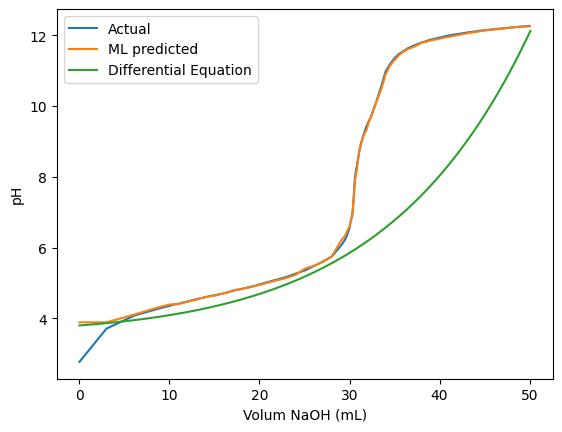

In [378]:
import numpy as np

def f(V, pH):
    dph_dV = (pH*2*(12/400-(0.0009)**pH)) + V/2000 -0.209
    return dph_dV

pH0 = 3.8
step = 0.01

V = np.arange(0, 50.1, step)

pH = np.zeros(len(V))
pH[0] = pH0

# Eulers method
for i in range(1, len(V)):
    pH[i] = pH[i-1] + step * f(V[i-1], pH[i-1])


plt.plot(titrering["Volum NaOH (mL)"], titrering["pH"], label='Actual')
plt.plot(titrering[["Volum NaOH (mL)"]], y_pred, label='ML predicted')
plt.plot(V, pH, label='Differential Equation')
plt.xlabel('Volum NaOH (mL)')
plt.ylabel('pH')
plt.legend()
plt.show()

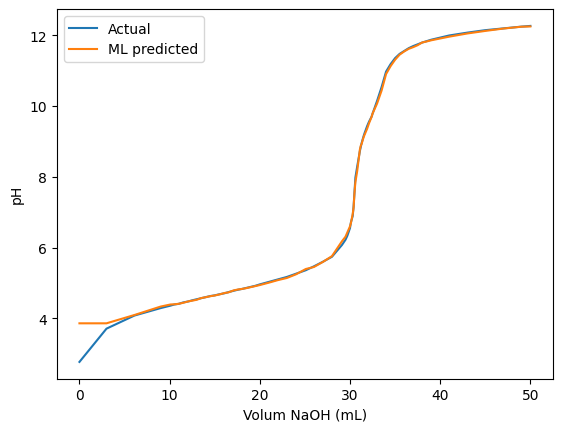

In [63]:
plt.plot(titrering["Volum NaOH (mL)"], titrering["pH"], label='Actual')
plt.plot(titrering[["Volum NaOH (mL)"]], y_pred, label='ML predicted')
plt.plot(V, pH)
plt.xlabel('Volum NaOH (mL)')
plt.ylabel('pH')
plt.legend()
plt.show()